In [2]:
import tensorflow as tf

In [3]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

In [4]:
train_labels=tf.keras.utils.to_categorical(train_labels,num_classes=10)
test_labels=tf.keras.utils.to_categorical(test_labels,num_classes=10)

In [5]:
import numpy as np
import pandas as pd

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
len(train_images)

50000

In [7]:
train_images[0].shape

(32, 32, 3)

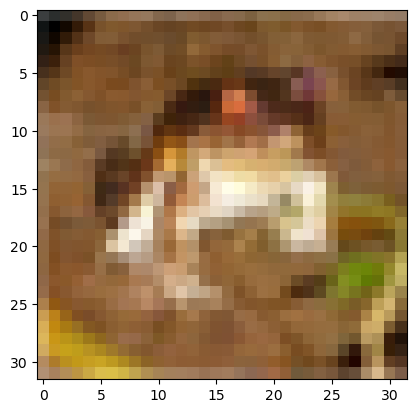

In [8]:
from matplotlib import pyplot as plt
plt.imshow(train_images[0].astype('uint8'))
plt.show()

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
model_CNN=tf.keras.models.Sequential()
    
model_CNN.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3, input_shape=[32,32,3]))
model_CNN.add(tf.keras.layers.Dropout(0.2))
model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
    
model_CNN.add(tf.keras.layers.Conv2D(filters=128,activation='relu',kernel_size=3))
model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
    
model_CNN.add(tf.keras.layers.Conv2D(filters=256,activation='relu',kernel_size=3))
model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
    
model_CNN.add(tf.keras.layers.Flatten())
    
model_CNN.add(tf.keras.layers.Dropout(0.5))
    
model_CNN.add(tf.keras.layers.Dense(units=256,activation='relu'))
model_CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
model_CNN.add(tf.keras.layers.Dense(units=64,activation='relu'))
    
model_CNN.add(tf.keras.layers.Dense(units=10,activation='softmax'))
    
model_CNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

checkpoints_1=ModelCheckpoint(filepath="model_CNN-{epoch:03d}.keras",monitor='val_accuracy',mode='max',save_best_only=True)
history_1=model_CNN.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=100,callbacks=[checkpoints_1])




Epoch 1/100


1563/1563 [==============================] - 145s 90ms/step - loss: 1.7994 - accuracy: 0.3597 - val_loss: 1.4635 - val_accuracy: 0.4703
Epoch 2/100
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4273 - accuracy: 0.4915 - val_loss: 1.3361 - val_accuracy: 0.5340
Epoch 3/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.2895 - accuracy: 0.5469 - val_loss: 1.2190 - val_accuracy: 0.5773
Epoch 4/100
1563/1563 [==============================] - 142s 91ms/step - loss: 1.1947 - accuracy: 0.5837 - val_loss: 1.1470 - val_accuracy: 0.6268
Epoch 5/100
1563/1563 [==============================] - 144s 92ms/step - loss: 1.1197 - accuracy: 0.6114 - val_loss: 1.0311 - val_accuracy: 0.6459
Epoch 6/100
1563/1563 [==============================] - 145s 92ms/step - loss: 1.0680 - accuracy: 0.6315 - val_loss: 0.9834 - val_accuracy: 0.6655
Epoch 7/100
1563/1563 [==============================] - 141s 90ms/step - loss: 1.0150 - accuracy: 0.6492 -

1563/1563 [==============================] - 65s 42ms/step - loss: 0.5116 - accuracy: 0.8351 - val_loss: 0.9812 - val_accuracy: 0.6824
Epoch 50/100
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6033 - accuracy: 0.8098 - val_loss: 0.7152 - val_accuracy: 0.7721
Epoch 51/100
1563/1563 [==============================] - 65s 42ms/step - loss: 0.5173 - accuracy: 0.8357 - val_loss: 0.7870 - val_accuracy: 0.7468
Epoch 52/100
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5642 - accuracy: 0.8221 - val_loss: 0.7653 - val_accuracy: 0.7541
Epoch 53/100
1563/1563 [==============================] - 65s 42ms/step - loss: 0.5180 - accuracy: 0.8366 - val_loss: 0.8077 - val_accuracy: 0.7331
Epoch 54/100
1563/1563 [==============================] - 65s 41ms/step - loss: 0.5124 - accuracy: 0.8348 - val_loss: 0.7318 - val_accuracy: 0.7655
Epoch 55/100
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5105 - accuracy: 0.8384 - val_loss: 0.7524 

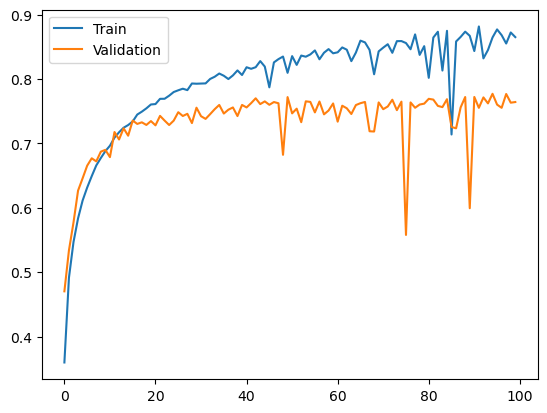

In [11]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [12]:
best_epoch_1=np.argmax(history_1.history['val_accuracy'])

In [13]:
print(best_epoch_1)

94


In [14]:
model_CNN.load_weights('model_CNN-{:03d}.keras'.format(best_epoch_1+1))

In [15]:
y_pred=model_CNN.predict(test_images)

313/313 [==============================] - 5s 14ms/step


In [16]:
y_pred.shape

(10000, 10)

In [17]:
test_labels.shape

(10000, 10)

In [18]:
y_pred=np.argmax(y_pred,axis=1)

In [19]:
y_pred=tf.keras.utils.to_categorical(y_pred,num_classes=10)

In [7]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(test_labels,y_pred)

0.7772

In [22]:
pretrained_mobilenet=tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False,input_shape=(32,32,3))

9406464/9406464 [==============================] - 2s 0us/step


In [23]:
model_mobilenet=tf.keras.models.Sequential()
model_mobilenet.add(pretrained_mobilenet)

model_mobilenet.add(tf.keras.layers.Flatten())
    
model_mobilenet.add(tf.keras.layers.Dense(units=256,activation='relu'))
model_mobilenet.add(tf.keras.layers.Dense(units=128,activation='relu'))
model_mobilenet.add(tf.keras.layers.Dense(units=64,activation='relu'))
    
model_mobilenet.add(tf.keras.layers.Dense(units=10,activation='softmax'))

model_mobilenet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
checkpoints_2=ModelCheckpoint(filepath="model_mobilenet-{epoch:03d}.keras",monitor='val_accuracy',mode='max',save_best_only=True)
history_2=model_mobilenet.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=100,callbacks=[checkpoints_2])

Epoch 1/100
1563/1563 [==============================] - 192s 106ms/step - loss: 1.2911 - accuracy: 0.5599 - val_loss: 1.6122 - val_accuracy: 0.5752
Epoch 2/100
1563/1563 [==============================] - 154s 99ms/step - loss: 0.9261 - accuracy: 0.6966 - val_loss: 1.2659 - val_accuracy: 0.6576
Epoch 3/100
1563/1563 [==============================] - 154s 98ms/step - loss: 0.8217 - accuracy: 0.7321 - val_loss: 1.2717 - val_accuracy: 0.6564
Epoch 4/100
1563/1563 [==============================] - 154s 98ms/step - loss: 0.7535 - accuracy: 0.7546 - val_loss: 1.2209 - val_accuracy: 0.6550
Epoch 5/100
1563/1563 [==============================] - 154s 98ms/step - loss: 0.6989 - accuracy: 0.7724 - val_loss: 1.2599 - val_accuracy: 0.6826
Epoch 6/100
1563/1563 [==============================] - 157s 101ms/step - loss: 0.6495 - accuracy: 0.7850 - val_loss: 0.9071 - val_accuracy: 0.7429
Epoch 7/100
1563/1563 [==============================] - 156s 100ms/step - loss: 0.6021 - accuracy: 0.8038 - v

1563/1563 [==============================] - 136s 87ms/step - loss: 0.1280 - accuracy: 0.9589 - val_loss: 0.6973 - val_accuracy: 0.8130
Epoch 57/100
1563/1563 [==============================] - 139s 89ms/step - loss: 0.1306 - accuracy: 0.9583 - val_loss: 0.7605 - val_accuracy: 0.8134
Epoch 58/100
1563/1563 [==============================] - 137s 88ms/step - loss: 0.1049 - accuracy: 0.9668 - val_loss: 0.8423 - val_accuracy: 0.8039
Epoch 59/100
1563/1563 [==============================] - 139s 89ms/step - loss: 0.1094 - accuracy: 0.9660 - val_loss: 0.6664 - val_accuracy: 0.8214
Epoch 60/100
1563/1563 [==============================] - 138s 88ms/step - loss: 0.1287 - accuracy: 0.9608 - val_loss: 0.7856 - val_accuracy: 0.8038
Epoch 61/100
1563/1563 [==============================] - 139s 89ms/step - loss: 0.1237 - accuracy: 0.9599 - val_loss: 0.7077 - val_accuracy: 0.8156
Epoch 62/100
1563/1563 [==============================] - 138s 88ms/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 

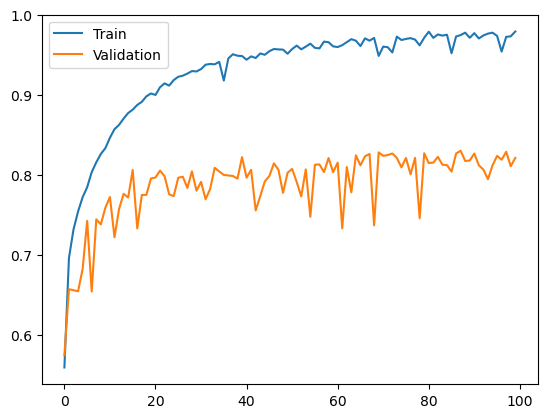

In [25]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [26]:
best_epoch_2=np.argmax(history_2.history['val_accuracy'])
print(best_epoch_2)

87


In [27]:
model_mobilenet.load_weights('model_mobilenet-{:03d}.keras'.format(best_epoch_2+1))

In [28]:
y_pred=model_mobilenet.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
y_pred=tf.keras.utils.to_categorical(y_pred,num_classes=10)
print(accuracy_score(y_pred,test_labels))

313/313 [==============================] - 7s 17ms/step
0.8305


In [29]:
pretrained_vgg16=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

58889256/58889256 [==============================] - 16s 0us/step


In [30]:
model_vgg16=tf.keras.models.Sequential()
model_vgg16.add(pretrained_vgg16)
model_vgg16.add(tf.keras.layers.Flatten())

model_vgg16.add(tf.keras.layers.Dense(256,activation='relu'))
model_vgg16.add(tf.keras.layers.Dense(128,activation='relu'))
model_vgg16.add(tf.keras.layers.Dense(10,activation='softmax'))

model_vgg16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
checkpoints_3=ModelCheckpoint(filepath="model_vgg16-{epoch:03d}.keras",monitor='val_accuracy',mode='max',save_best_only=True)
history_3=model_vgg16.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=100,callbacks=[checkpoints_3])

Epoch 1/100
1563/1563 [==============================] - 571s 363ms/step - loss: 1.9709 - accuracy: 0.2470 - val_loss: 1.5821 - val_accuracy: 0.3692
Epoch 2/100
1563/1563 [==============================] - 571s 365ms/step - loss: 1.4590 - accuracy: 0.4244 - val_loss: 1.6524 - val_accuracy: 0.3646
Epoch 3/100
1563/1563 [==============================] - 574s 367ms/step - loss: 1.2844 - accuracy: 0.5182 - val_loss: 1.2166 - val_accuracy: 0.5615
Epoch 4/100
1563/1563 [==============================] - 575s 368ms/step - loss: 1.0377 - accuracy: 0.6300 - val_loss: 1.0391 - val_accuracy: 0.6467
Epoch 5/100
1563/1563 [==============================] - 572s 366ms/step - loss: 0.9289 - accuracy: 0.6726 - val_loss: 0.9176 - val_accuracy: 0.6918
Epoch 6/100
1563/1563 [==============================] - 573s 367ms/step - loss: 0.8328 - accuracy: 0.7158 - val_loss: 0.8937 - val_accuracy: 0.7070
Epoch 7/100
1563/1563 [==============================] - 575s 368ms/step - loss: 0.7466 - accuracy: 0.7466

1563/1563 [==============================] - 633s 405ms/step - loss: 2.9323 - accuracy: 0.1000 - val_loss: 2.5281 - val_accuracy: 0.1000
Epoch 56/100
1563/1563 [==============================] - 638s 408ms/step - loss: 2.3925 - accuracy: 0.1000 - val_loss: 2.3219 - val_accuracy: 0.1000
Epoch 57/100
1563/1563 [==============================] - 608s 389ms/step - loss: 2.3086 - accuracy: 0.1000 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 58/100
1563/1563 [==============================] - 614s 393ms/step - loss: 2.3029 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 59/100
1563/1563 [==============================] - 619s 396ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 60/100
1563/1563 [==============================] - 641s 410ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 61/100
1563/1563 [==============================] - 629s 402ms/step - loss: 2.3028 - accuracy: 0.0991 - val

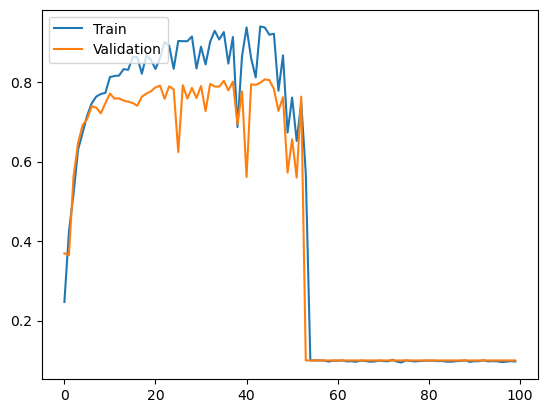

In [32]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [33]:
best_epoch_3=np.argmax(history_3.history['val_accuracy'])
print(best_epoch_3)

44


In [34]:
model_vgg16.load_weights('model_vgg16-{:03d}.keras'.format(best_epoch_3+1))

In [35]:
y_pred=model_vgg16.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
y_pred=tf.keras.utils.to_categorical(y_pred,num_classes=10)
print(accuracy_score(y_pred,test_labels))

313/313 [==============================] - 36s 113ms/step
0.8068


In [36]:
pretrained_vgg19=tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=(32,32,3))

80134624/80134624 [==============================] - 17s 0us/step


In [37]:
model_vgg19=tf.keras.models.Sequential()
model_vgg19.add(pretrained_vgg19)
model_vgg19.add(tf.keras.layers.Flatten())
model_vgg19.add(tf.keras.layers.Dense(256,activation='relu'))
model_vgg19.add(tf.keras.layers.Dense(128,activation='relu'))
model_vgg19.add(tf.keras.layers.Dense(10,activation='softmax'))
model_vgg19.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
checkpoints_4=ModelCheckpoint(filepath="model_vgg19-{epoch:03d}.keras",monitor='val_accuracy',mode='max',save_best_only=True)
history_4=model_vgg19.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=100,callbacks=checkpoints_4)

Epoch 1/100
1563/1563 [==============================] - 819s 521ms/step - loss: 1.9974 - accuracy: 0.2251 - val_loss: 1.7544 - val_accuracy: 0.3034
Epoch 2/100
1563/1563 [==============================] - 805s 515ms/step - loss: 1.5970 - accuracy: 0.3645 - val_loss: 1.4232 - val_accuracy: 0.4363
Epoch 3/100
1563/1563 [==============================] - 803s 514ms/step - loss: 1.3900 - accuracy: 0.4606 - val_loss: 1.2816 - val_accuracy: 0.5043
Epoch 4/100
1563/1563 [==============================] - 1000s 640ms/step - loss: 1.2898 - accuracy: 0.5226 - val_loss: 1.2450 - val_accuracy: 0.5434
Epoch 5/100
1563/1563 [==============================] - 1052s 673ms/step - loss: 1.1230 - accuracy: 0.5953 - val_loss: 1.1817 - val_accuracy: 0.5884
Epoch 6/100
1563/1563 [==============================] - 1050s 672ms/step - loss: 1.1093 - accuracy: 0.6030 - val_loss: 1.0369 - val_accuracy: 0.6353
Epoch 7/100
1563/1563 [==============================] - 1052s 673ms/step - loss: 0.9203 - accuracy: 0.

1563/1563 [==============================] - 803s 514ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 56/100
1563/1563 [==============================] - 802s 513ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 57/100
1563/1563 [==============================] - 817s 523ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 58/100
1563/1563 [==============================] - 815s 521ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 59/100
1563/1563 [==============================] - 819s 524ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 60/100
1563/1563 [==============================] - 826s 528ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 61/100
1563/1563 [==============================] - 837s 536ms/step - loss: 2.3028 - accuracy: 0.0957 - val

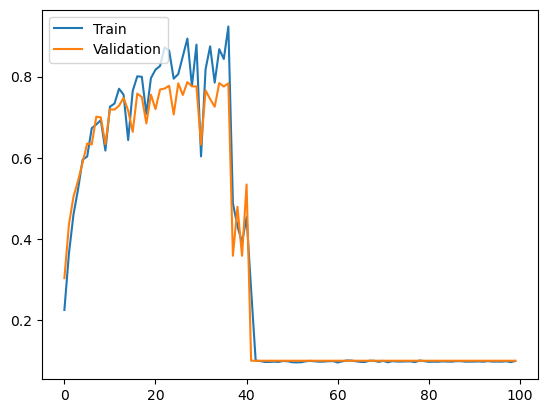

In [39]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [40]:
best_epoch_4=np.argmax(history_4.history['val_accuracy'])
print(best_epoch_4)

27


In [41]:
model_vgg19.load_weights('model_vgg19-{:03d}.keras'.format(best_epoch_4+1))

In [42]:
y_pred=model_vgg19.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
y_pred=tf.keras.utils.to_categorical(y_pred,num_classes=10)
accuracy_score(y_pred,test_labels)

313/313 [==============================] - 44s 140ms/step


0.7865

In [8]:
resized_train_images=tf.image.resize(train_images,(224,224))

In [9]:
del train_images

In [10]:
pretrained_vgg19=tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [11]:
resized_train_images=tf.keras.applications.vgg19.preprocess_input(resized_train_images)

ResourceExhaustedError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[50000,224,224,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:StridedSlice] name: strided_slice/

In [ ]:
resized_test_images=tf.image.resize(test_images,(224,224))
resized_test_images=tf.keras.applications.vgg19.preprocess_input(resized_test_images)

In [ ]:
del test_images

In [ ]:
model_vgg19=tf.keras.models.Sequential()
model_vgg19.add(pretrained_vgg19)
model_vgg19.add(tf.keras.layers.Flatten())
model_vgg19.add(tf.keras.layers.Dense(10,activation='softmax'))
model_vgg19.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
checkpoints_5=ModelCheckpoint(filepath="model_vgg19_re-{epoch:02d}.keras",monitor='val_accuracy',mode='max',save_best_only=True)
history_5=model_vgg19.fit(resized_train_images,train_labels,validation_data=(resized_test_images,test_labels),epochs=10,callbacks=checkpoints_5)

In [ ]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
best_epoch_5=np.argmax(history_5.history['val_accuracy'])
print(best_epoch_5)

In [ ]:
model_vgg19.load_weights('model_vgg19-{:03d}.keras'.format(best_epoch_5+1))

In [ ]:
y_pred=model_vgg19.predict(resized_test_images)
y_pred=np.argmax(y_pred,axis=1)
y_pred=tf.keras.utils.to_categorical(y_pred,num_classes=10)
accuracy_score(y_pred,test_labels)

In [54]:
del best_epoch_1
del best_epoch_2
del best_epoch_3
del best_epoch_4

In [55]:
del history_1
del history_2
del history_3
del history_4

NameError: name 'train_images' is not defined